### 편향과 분산
- 편향(bias) : 예측값과 정답 간의 관계, 예측값과 실제값 사이의 제곱 에러
- 분산(variance) : 예측값끼리의 관계

### 모델 복잡도
- 내부 구조가 이해하기 어려운 모델, 모델마다 복잡성 기준 및 결정 다름
- 복잡도 고려 사항
    - 특성 파라미터 개수
    - 하이퍼 파라미터 개수
    - 입력 데이터셋 개수
    - 학습 반복 횟수
    - 앙상블 모델 개수
    - 모델 차수(모델의 특성 개수)
- 복잡도 제어 방법
    - 입력 데이터 셋 늘리기
    - 학습 반복 횟수 조절 <- early stopping
    - 모델 차수 감소
    - __특성 파라미터 개수 줄이기__  -> 가장 자주 사용
    - __특성 파라미터마다 패널티(규제) 부여 및 정칙화(Regularization)__ 
    - 앙상블 모델 개수

## SVM(support vector machine)
- SVC(분류와 관련), SVR(회귀와 관련)
- 소프트 마진(soft margin) : 하나의 선으로 완전히 분류 -> 과적합 발생&마진 최소화, __분류오류 허용하는 방식__
- 일반화 
    - 과적합 문제 해결 위한 방법
    - 데이터 분류 후 마진이 최대가 되는 구분선 설정
- 함수: from sklearn.svm import SVC
    - 주요 파라미터 : C=1.0(규제 강도:작은 값일수록 강해짐), gamma=scale('rbf', 'poly' 및 'sigmoid'에 대한 커널 계수)

(1797, 64)


<Figure size 432x288 with 0 Axes>

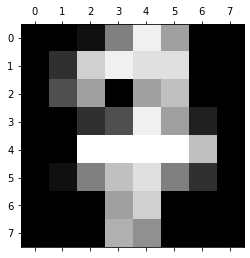

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
(1797, 64)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[17])

plt.show()

In [8]:
# 데이터 로딩
from sklearn.datasets import load_digits
data, target = load_digits(return_X_y=True, as_frame=True)

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [25]:
print(digits['images'][1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]


In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [29]:
# 데이터 나누기
train_data, test_data, train_target, test_target = train_test_split(data, target, random_state=42)

In [34]:
# 표준화 작업
st = StandardScaler()
st.fit(train_data)
st.fit(test_data)
st.transform(train_data)
st.transform(test_data)

array([[ 0.        , -0.30137986, -1.12200215, ...,  1.2474033 ,
         0.80032845, -0.18730706],
       [ 0.        , -0.30137986,  1.28332944, ..., -0.94529781,
        -0.50078355, -0.18730706],
       [ 0.        , -0.30137986,  0.62732991, ...,  0.2353874 ,
        -0.50078355, -0.18730706],
       ...,
       [ 0.        ,  0.78358764,  1.72066245, ...,  0.91006467,
         0.80032845, -0.18730706],
       [ 0.        , -0.30137986, -1.12200215, ..., -0.27062055,
        -0.50078355, -0.18730706],
       [ 0.        ,  6.20842516,  2.37666197, ..., -1.11396713,
        -0.50078355, -0.18730706]])

### SVC 사용

In [37]:
sv = SVC(C=1, gamma='scale')
sv.fit(train_data, train_target)
print(sv.score(train_data, train_target))
print(sv.score(test_data, test_target))

0.9962880475129918
0.9866666666666667


### 확률 predict 구해보기

In [47]:
print(sv.predict([test_data.iloc[1,:]]), test_target.iloc[1])

[9] 9


c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [49]:
train_predict = sv.predict(train_data)
test_predict = sv.predict(test_data)

In [54]:
test_predict[test_predict != test_target]

array([9, 9, 7, 5, 6, 8])

In [55]:
test_target[test_predict != test_target]

482     8
480     7
69      9
1582    9
1361    5
1727    3
Name: target, dtype: int32

### 로지스틱 테스트

In [63]:
from sklearn.linear_model import LogisticRegression
Lor = LogisticRegression(max_iter=3000)
Lor.fit(train_data, train_target)

LogisticRegression(max_iter=3000)

In [65]:
print(Lor.score(train_data, train_target))
print(Lor.score(test_data, test_target))

1.0
0.9733333333333334


### kNN 테스트

In [66]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(train_data, train_target)

KNeighborsClassifier()

In [68]:
print(knn.score(train_data,train_target))
print(knn.score(test_data,test_target))

0.9888641425389755
0.9933333333333333


# 결론

|제목|TRAIN|TEST|
|------|---|---|
|SVM|0.996|0.987|
|로지스틱|1.0|0.973|
|KNN|0.989|0.993|